<style>
table tr:hover {
    background-color: #FFC0D9 !important;
}
</style>


# Fourier Transform Pairs and Its Applications

This table summarizes some of the most commonly encountered Fourier Transform pairs, showing the time-domain functions and their corresponding frequency-domain representations. For a complete reference please refer to the following link: https://ethz.ch/content/dam/ethz/special-interest/baug/ibk/structural-mechanics-dam/education/identmeth/fourier.pdf

| **Time Domain**                        | **Frequency Domain**                                     |
|----------------------------------------|---------------------------------------------------------|
| $ \delta(t) $                          | $ 1 $                                                   |
| $ 1 $                                  | $ \delta(f) $                                           |
| $ u(t) $                                | $ \frac{1}{j2\pi f} + \frac{1}{2} \delta(f) $           |
| $ e^{- \alpha t} u(t) $                 | $ \frac{1}{\alpha + j2\pi f} $                          |
| $ e^{j2\pi f_0 t} $                     | $ \delta(f - f_0) $                                     |
| $ \cos(2\pi f_0 t) $                    | $ \frac{1}{2} [ \delta(f - f_0) + \delta(f + f_0) ] $   |
| $ \sin(2\pi f_0 t) $                    | $ \frac{1}{2j} [ \delta(f - f_0) - \delta(f + f_0) ] $  |
| $ e^{-a |t|} $                          | $ \frac{2a}{a^2 + (2\pi f)^2} $                         |
| $ \frac{\sin(\pi f_0 t)}{\pi t} $       | $ u\left( f + \frac{f_0}{2} \right) - u\left( f - \frac{f_0}{2} \right) $ |


Let's visualize some Fourier Transform pairs:

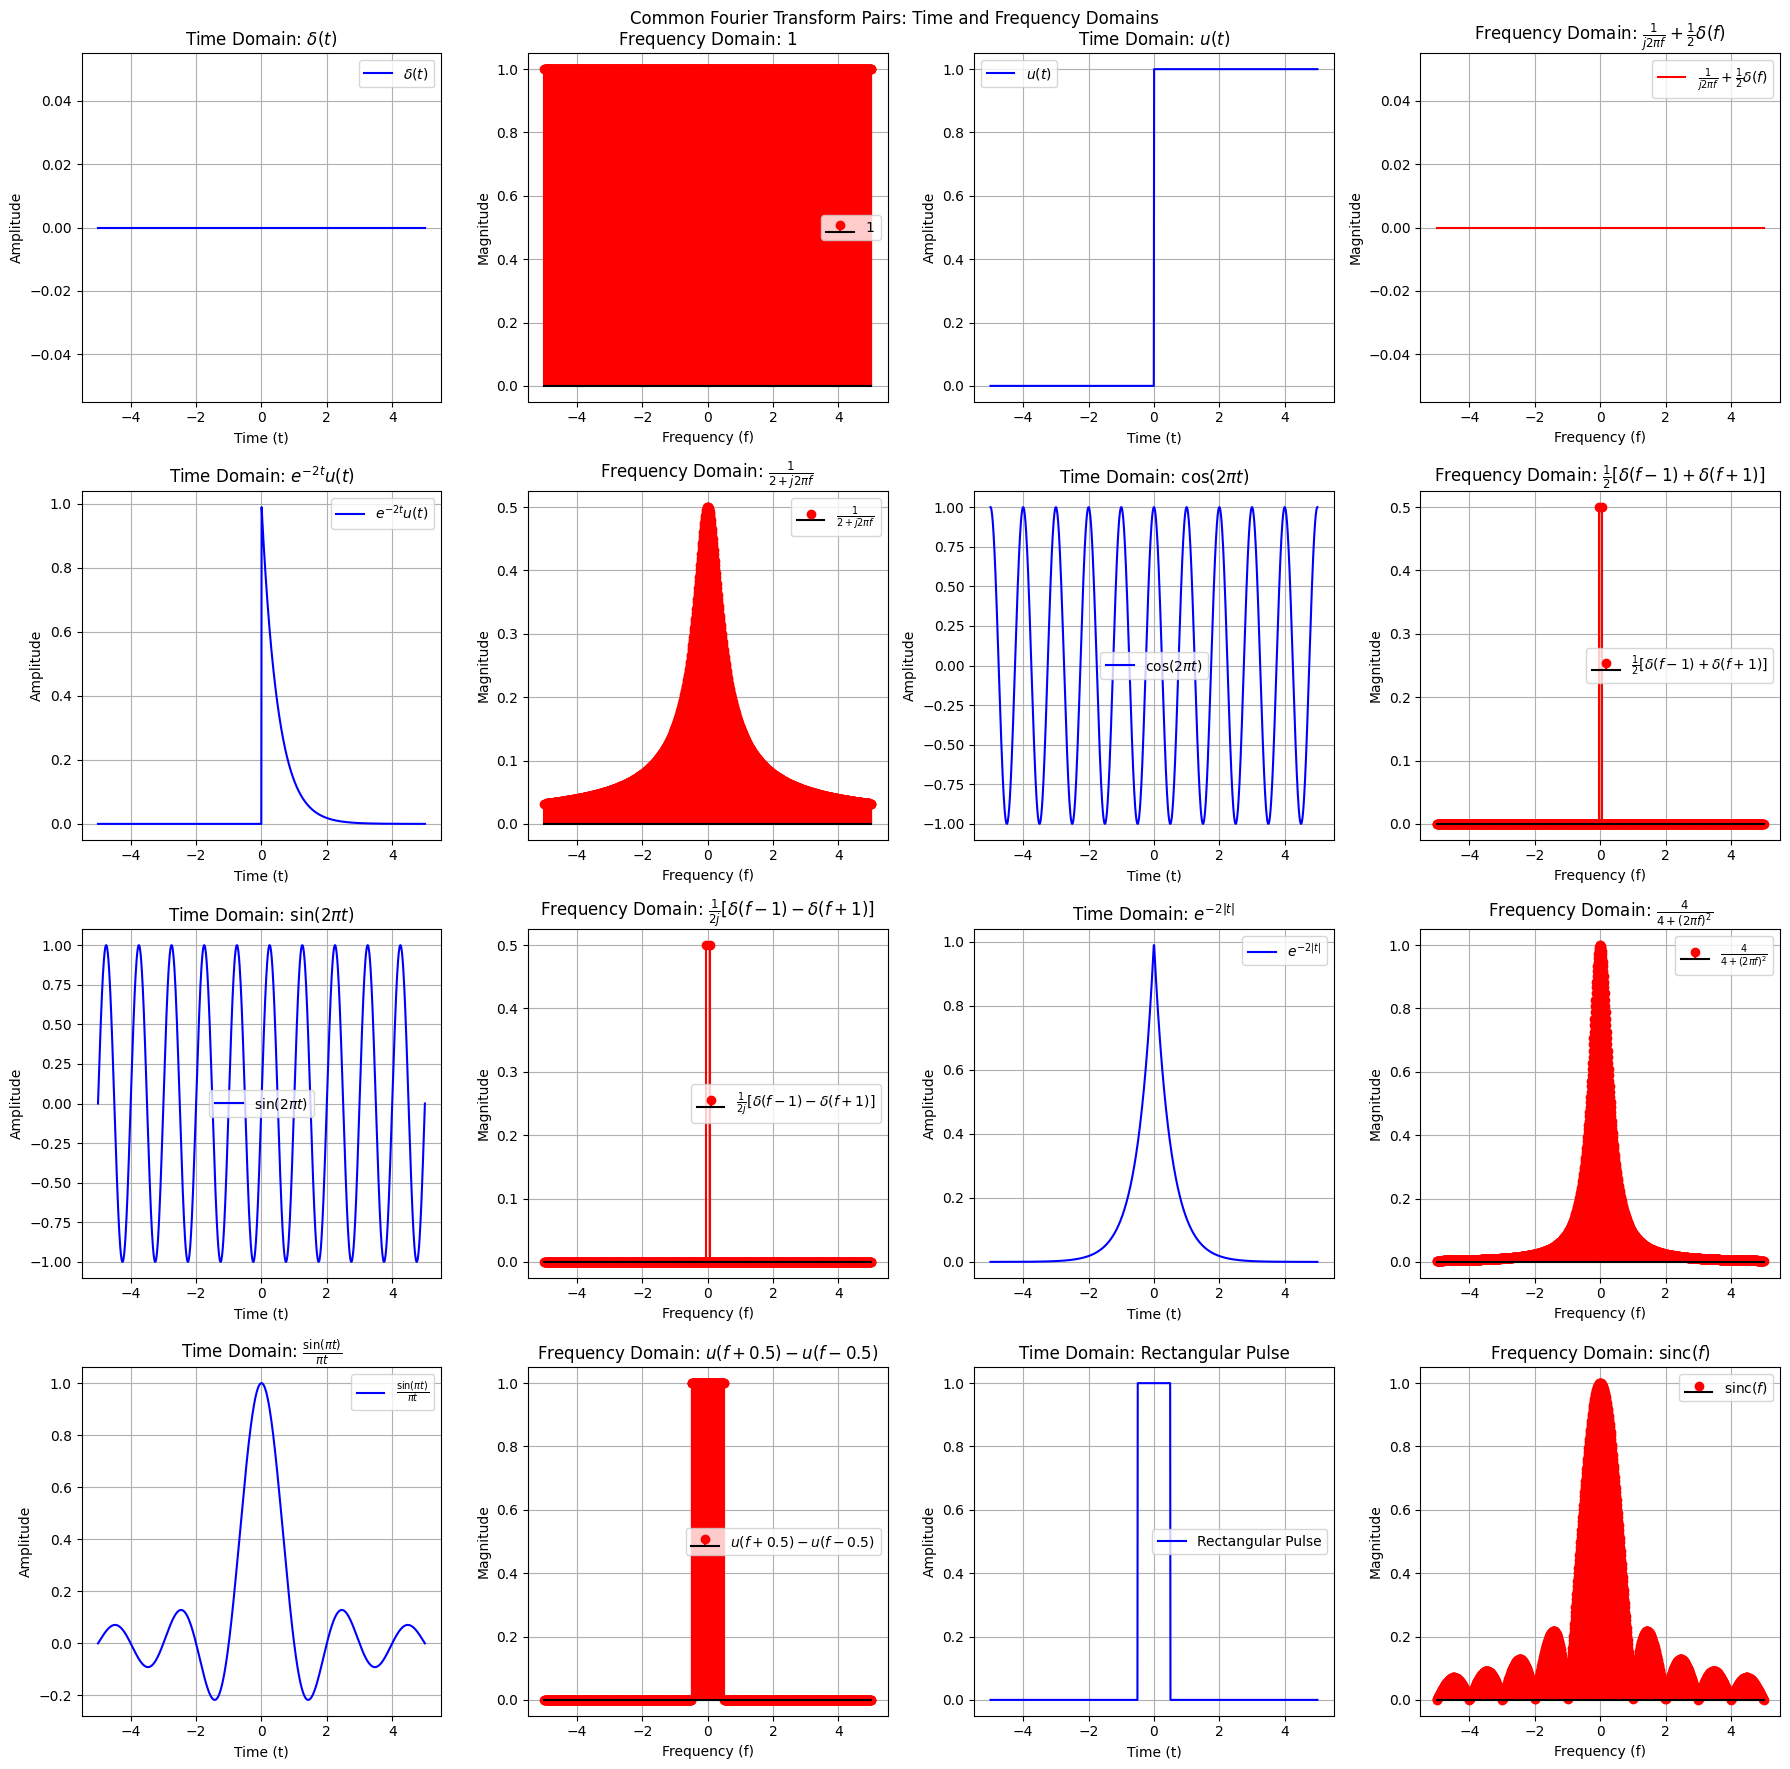

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range for time and frequency
t = np.linspace(-5, 5, 1000)
f = np.linspace(-5, 5, 1000)

# Define common time-domain functions
delta_t = np.zeros_like(t)
delta_t[np.abs(t) < 0.005] = 1  # Approximation for delta function

u_t = np.heaviside(t, 1)  # Unit step function
exp_pulse = np.exp(-2 * t) * (t >= 0)  # Exponential pulse
cos_t = np.cos(2 * np.pi * t)  # Cosine function
sin_t = np.sin(2 * np.pi * t)  # Sine function
exp_abs_t = np.exp(-2 * np.abs(t))  # Exponential decay for all t
sinc_t = np.sinc(t)  # Sinc function
rect_t = np.heaviside(t + 0.5, 1) - np.heaviside(t - 0.5, 1)  # Rectangular pulse

# Fourier Transform pairs' frequency responses
delta_f = np.ones_like(f)  # Fourier Transform of delta(t) is 1
u_f = 1 / (1j * 2 * np.pi * f) + 0.5 * delta_t  # Fourier Transform of u(t)
exp_pulse_f = 1 / (2 + 1j * 2 * np.pi * f)  # Fourier Transform of exp(-2t)u(t)
cos_f = np.zeros_like(f)
cos_f[495] = 0.5  # Positive frequency impulse for cosine at f = 1
cos_f[505] = 0.5  # Negative frequency impulse for cosine at f = -1

# Handling sine function separately using magnitude for vertical lines
sin_f = np.zeros_like(f)
sin_f[495] = 0.5  # Positive frequency impulse for sine at f = 1
sin_f[505] = 0.5  # Negative frequency impulse for sine at f = -1

exp_abs_f = 4 / (4 + (2 * np.pi * f) ** 2)  # Fourier Transform of exp(-2|t|)
sinc_f = np.heaviside(f + 0.5, 1) - np.heaviside(f - 0.5, 1)  # Sinc FT
rect_f = np.sinc(f)  # Fourier Transform of rectangular pulse

# Prepare pairs of (time-domain, frequency-domain) for visualization
pairs = [
    (delta_t, delta_f, r'$\delta(t)$', r'$1$'),
    (u_t, u_f.real, r'$u(t)$', r'$\frac{1}{j2\pi f} + \frac{1}{2} \delta(f)$'),
    (exp_pulse, np.abs(exp_pulse_f), r'$e^{-2t} u(t)$', r'$\frac{1}{2 + j2\pi f}$'),
    (cos_t, np.abs(cos_f), r'$\cos(2\pi t)$', r'$\frac{1}{2} [ \delta(f - 1) + \delta(f + 1) ]$'),
    (sin_t, np.abs(sin_f), r'$\sin(2\pi t)$', r'$\frac{1}{2j} [ \delta(f - 1) - \delta(f + 1) ]$'),
    (exp_abs_t, exp_abs_f, r'$e^{-2 |t|}$', r'$\frac{4}{4 + (2\pi f)^2}$'),
    (sinc_t, sinc_f, r'$\frac{\sin(\pi t)}{\pi t}$', r'$u(f + 0.5) - u(f - 0.5)$'),
    (rect_t, np.abs(rect_f), r'Rectangular Pulse', r'$\mathrm{sinc}(f)$')  # Fixed LaTeX issue
]

# Create a grid of subplots (4x4) to visualize the pairs
fig, axes = plt.subplots(4, 4, figsize=(18, 18))

# Plot each pair in the grid
for idx, (time_signal, freq_signal, time_label, freq_label) in enumerate(pairs):
    row = idx // 2  # Determine the row index
    col = (idx % 2) * 2  # Calculate the starting column for time-domain plot

    # Time-domain plot
    ax_time = axes[row, col]
    ax_time.plot(t, time_signal, label=time_label, color='b')
    ax_time.set_title(f'Time Domain: {time_label}')
    ax_time.set_xlabel('Time (t)')
    ax_time.set_ylabel('Amplitude')
    ax_time.legend()
    ax_time.grid()

    # Frequency-domain plot with vertical lines for impulses
    ax_freq = axes[row, col + 1]
    if freq_signal.max() > 0:
        ax_freq.stem(f, freq_signal, label=freq_label, linefmt='r-', markerfmt='ro', basefmt='k-')
    else:
        ax_freq.plot(f, freq_signal, label=freq_label, color='r')
    ax_freq.set_title(f'Frequency Domain: {freq_label}')
    ax_freq.set_xlabel('Frequency (f)')
    ax_freq.set_ylabel('Magnitude')
    ax_freq.legend()
    ax_freq.grid()

# Adjust layout and show the plot
plt.suptitle('Common Fourier Transform Pairs: Time and Frequency Domains')
plt.tight_layout()
plt.show()


# Filtering a Signal Using Fourier Transform

The Fourier Transform is an effective tool for manipulating signals in the frequency domain, allowing us to apply operations such as **filtering**, **amplification**, and **smoothing**. By transforming a signal into its frequency components, we can selectively modify specific frequency ranges to achieve desired effects in the time domain.

## Example: Low-Pass Filtering

In this example, we start with a **complex signal** composed of multiple sinusoidal components and **random noise**. We apply a **low-pass filter** in the frequency domain to attenuate high-frequency components, resulting in a smoother signal in the time domain.

### 1. Initial Signal

The original signal is a combination of:

- A low-frequency sine wave component
- A high-frequency sine wave component
- Additive random noise

### 2. Fourier Transform

We compute the **Fourier Transform** of the signal to obtain its frequency representation. This allows us to identify which frequencies dominate the signal and decide which ones to modify.

### 3. Applying the Low-Pass Filter

A **low-pass filter** allows low frequencies to pass while attenuating high frequencies. We create a filter in the frequency domain that multiplies the Fourier coefficients, reducing the amplitude of frequencies beyond a certain cutoff.

### 4. Inverse Fourier Transform

We then compute the **Inverse Fourier Transform** of the filtered frequency representation to obtain the modified signal in the time domain, demonstrating the effect of the filtering operation.

### Visualization

The following plots show:

1. **Original Signal** in the time domain.
2. **Frequency Spectrum** of the original signal.
3. **Filtered Frequency Spectrum** after applying the low-pass filter.
4. **Filtered Signal** in the time domain.


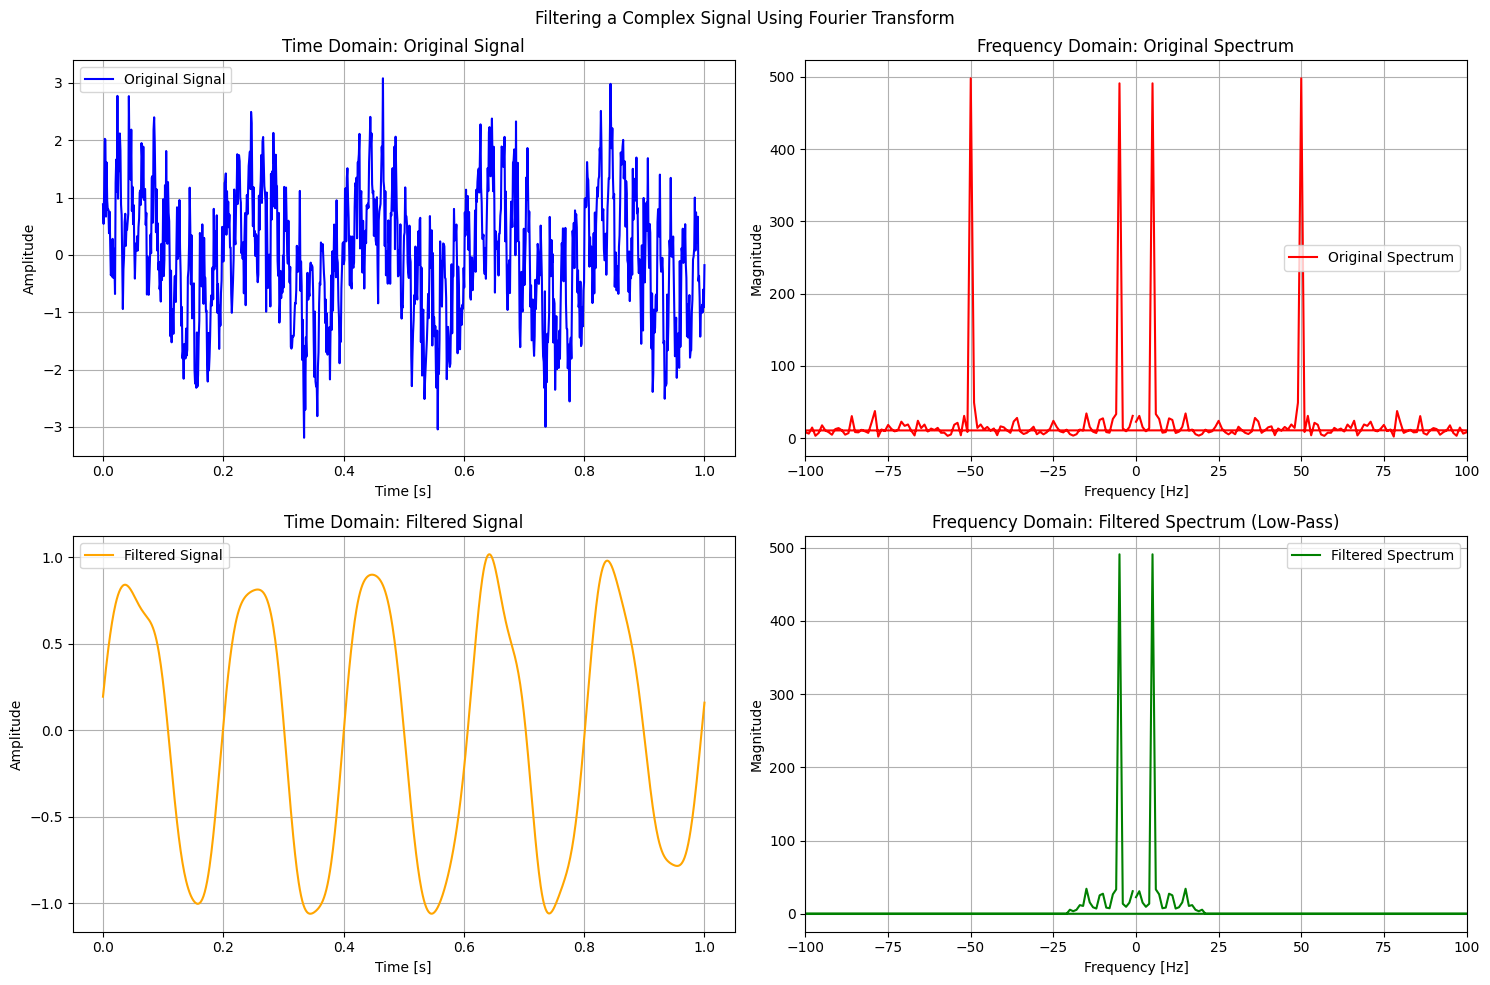

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a complex signal with multiple frequency components
np.random.seed(0)  # For reproducibility
t = np.linspace(0, 1, 1000)
low_freq = np.sin(2 * np.pi * 5 * t)  # Low frequency component (5 Hz)
high_freq = np.sin(2 * np.pi * 50 * t)  # High frequency component (50 Hz)
noise = 0.5 * np.random.randn(len(t))  # Random noise
signal = low_freq + high_freq + noise  # Combined signal

# Step 2: Compute the Fourier Transform of the signal
signal_fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(t), d=t[1] - t[0])

# Step 3: Create a low-pass filter (cutoff frequency = 20 Hz)
cutoff = 20  # Define cutoff frequency
filter_mask = np.abs(frequencies) <= cutoff  # Filter mask

# Step 4: Apply the filter to the Fourier coefficients
filtered_fft = signal_fft * filter_mask

# Step 5: Inverse Fourier Transform to get the filtered signal
filtered_signal = np.fft.ifft(filtered_fft)

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Original signal in the time domain
ax[0, 0].plot(t, signal, color='b', label='Original Signal')
ax[0, 0].set_title('Time Domain: Original Signal')
ax[0, 0].set_xlabel('Time [s]')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].legend()
ax[0, 0].grid()

# Frequency domain: Original signal
ax[0, 1].plot(frequencies, np.abs(signal_fft), color='r', label='Original Spectrum')
ax[0, 1].set_title('Frequency Domain: Original Spectrum')
ax[0, 1].set_xlabel('Frequency [Hz]')
ax[0, 1].set_ylabel('Magnitude')
ax[0, 1].set_xlim(-100, 100)
ax[0, 1].legend()
ax[0, 1].grid()

# Frequency domain: Filtered signal
ax[1, 1].plot(frequencies, np.abs(filtered_fft), color='g', label='Filtered Spectrum')
ax[1, 1].set_title('Frequency Domain: Filtered Spectrum (Low-Pass)')
ax[1, 1].set_xlabel('Frequency [Hz]')
ax[1, 1].set_ylabel('Magnitude')
ax[1, 1].set_xlim(-100, 100)
ax[1, 1].legend()
ax[1, 1].grid()

# Filtered signal in the time domain
ax[1, 0].plot(t, filtered_signal.real, color='orange', label='Filtered Signal')
ax[1, 0].set_title('Time Domain: Filtered Signal')
ax[1, 0].set_xlabel('Time [s]')
ax[1, 0].set_ylabel('Amplitude')
ax[1, 0].legend()
ax[1, 0].grid()

# Show the plots
plt.suptitle('Filtering a Complex Signal Using Fourier Transform')
plt.tight_layout()
plt.show()
